# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id =df.loc[df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique() 
duplicate_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = df.loc[df["Mouse ID"] == "g989"]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= df[df['Mouse ID'].isin(duplicate_id) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
drug_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"] .mean()
drug_median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_vari = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_sem = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


In [9]:
drug_sum = pd.DataFrame({"Mean Tumor Volume": drug_mean,"Median Tumor Volume": drug_median,"Tumor Volume Variance": drug_vari,"Tumor Volume Std. Dev.": drug_std,"Tumor Volume Std. Err.": drug_sem})

drug_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std', 'sem'])
agg_sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

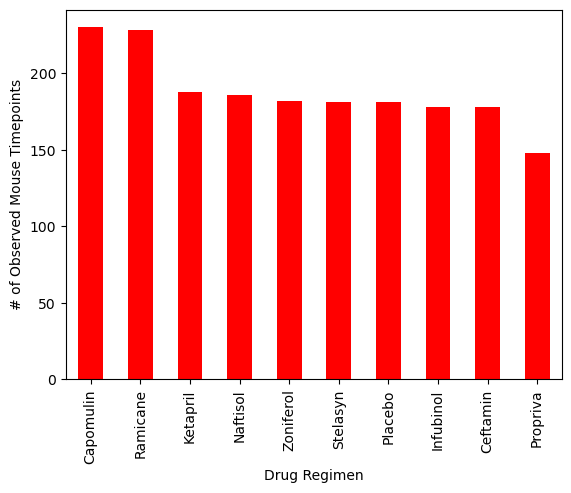

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
 # Count the mice for each drug
plot_pandas = mice_count.plot.bar(color ="red")
 # Choosing the bar graph with red bars 
plt.xlabel("Drug Regimen") # Name the x-axis 
plt.ylabel("# of Observed Mouse Timepoints") # Name the y-axis
plt.show()


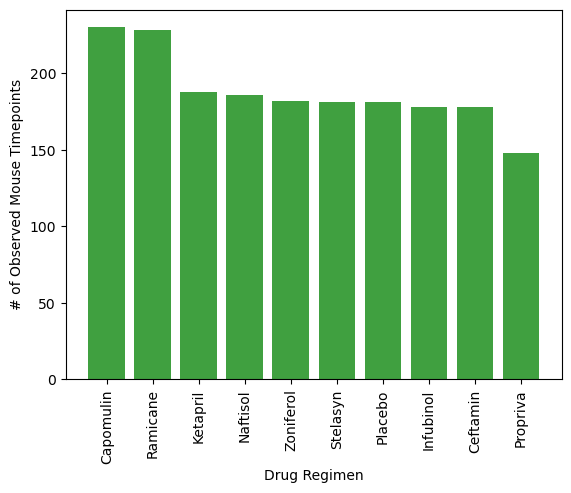

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis,y_axis,color="green",align="center",alpha=.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

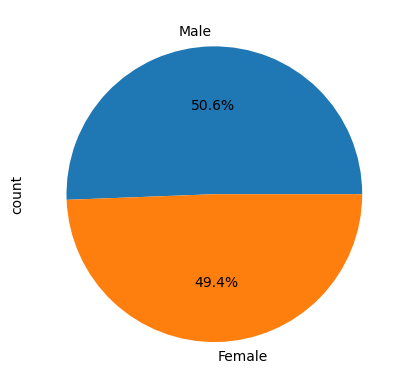

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dist=df["Sex"].value_counts()
dist.plot.pie(autopct="%1.1f%%")
plt.show()

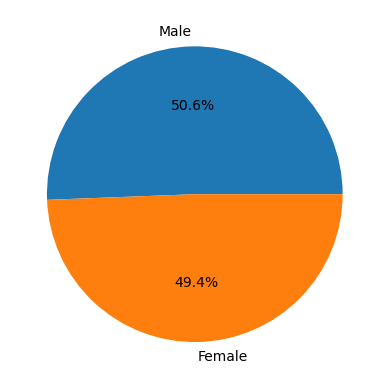

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=["Male","Female"]
plt.pie(dist,autopct="%1.1f%%",labels=sex)
plt.show()

In [15]:
df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sorted_df = df[df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
fe_mouse = sorted_df.groupby(["Mouse ID"]).max() 
fe_mouse_cleared = fe_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=fe_mouse_cleared[["Mouse ID","Timepoint"]].merge(df,on=["Mouse ID","Timepoint"],how="left")
merged_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", 'Ceftamin']
drug=[]
# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
regimens = df[df["Drug Regimen"].isin(drug_list)]
sorted_regimens = regimens.sort_values(["Timepoint"], ascending=True)

sorted_regimen_data = sorted_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


grouped_regimen_data = sorted_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
data_df=pd.DataFrame(grouped_regimen_data)

data_df
    # Determine outliers using upper and lower bounds

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

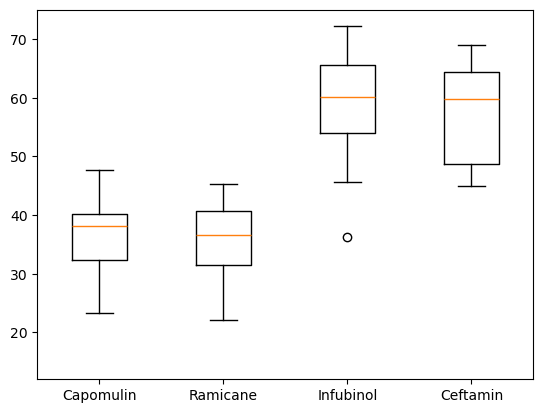

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
tumor_lists = data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumor_lists)
tumor_df = tumor_df.reindex(drug_list)
tumor_volumes = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=drug_list)
plt.ylim(12, 75)
plt.show()
    # Determine outliers using upper and lower bounds

## Line and Scatter Plots

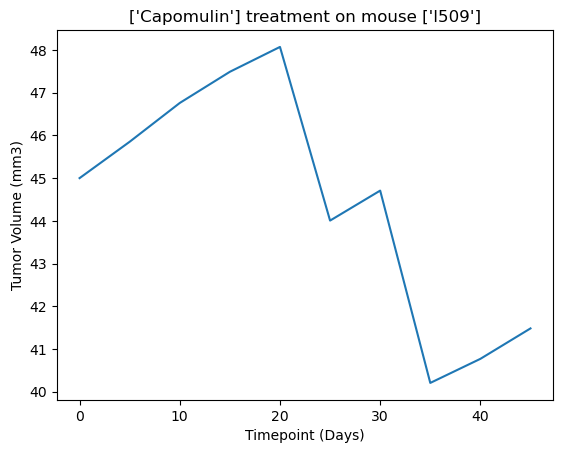

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = df.loc[df["Mouse ID"] == "l509"]
mouse_df=single_mouse.set_index("Timepoint")
single_drug=mouse_df["Drug Regimen"].unique()
mouse_id=mouse_df["Mouse ID"].unique()
trimmed_mouse_df=mouse_df["Tumor Volume (mm3)"]
y_label="Tumor Volume (mm3)"
plt.plot(trimmed_mouse_df)
plt.title(f"{single_drug} treatment on mouse {mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel(y_label)
plt.show()

In [20]:
single_regimen_df=df.loc[df["Drug Regimen"]=="Capomulin"]
single_regimen_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


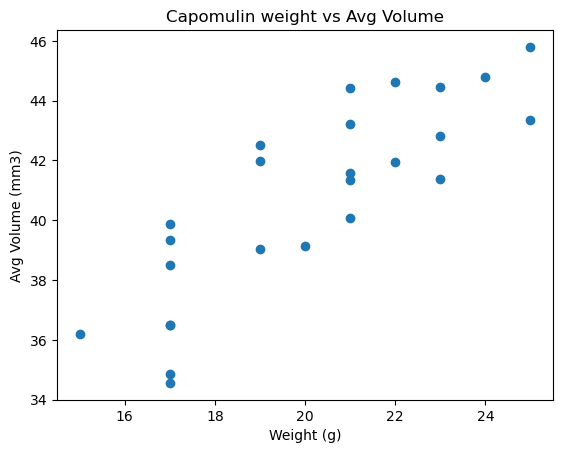

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol =single_regimen_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
avg_weight =single_regimen_df.groupby('Mouse ID')["Weight (g)"].mean()
plt.scatter(avg_weight,avg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Volume (mm3)")
plt.title("Capomulin weight vs Avg Volume")
plt.show()


## Correlation and Regression

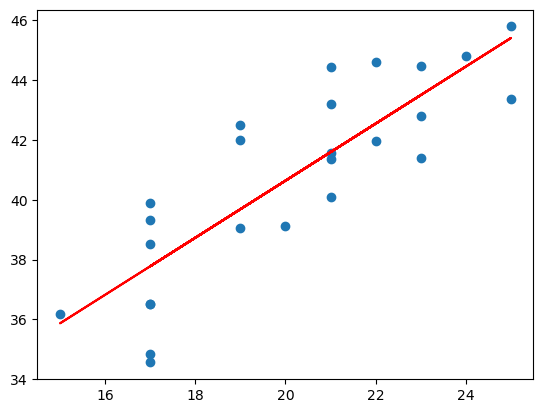

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=avg_weight
y_values=avg_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()
